In [17]:
import numpy as np
import xarray as xr
from minisom import MiniSom
import pandas as pd
from sklearn.preprocessing import RobustScaler
import pprint
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
from matplotlib import colormaps as cm
from som_2var_training import read_and_transform, build_scaler, train_som

# This is old, but still good to look at


In [136]:
prefs = {'filename': "/home/z2034747/Research/Datasets/combine_z500_pwat.nc", 
         'var1': 'z500', 'var2': 'pwat', 'wlon': 220, 'elon': 305, 'nlat': 55, 'slat': 20, 
         'som_config': {'x': 4, 'y': 4, 'sigma': 0.5, 'random_seed': 42},
         'som_train': {'num_iteration': 10000, 'random_order': True, 'verbose': True}}

trained_som, trained_scaler, train_info, xr_data = train_som(prefs)

# win_map = trained_som.win_map(train_info['som_train']['data'])
# avg_data = [np.reshape(trained_scaler.inverse_transform([np.mean(win_map[node], axis=0)])[0],(len(xr_data.lat), len(xr_data.lon)))for node in sorted(win_map.keys())]
# node_keys = sorted(win_map.keys())

# length, width = prefs['som_config']['x'], prefs['som_config']['y']
# frequencies = trained_som.activation_response(train_info['som_train']['data']).flatten()



current model configuration
{'input_len': 24282, 'random_seed': 42, 'sigma': 0.5, 'x': 4, 'y': 4}
current training configuration
{'data': array([[-0.20787   , -0.23133911, -0.24382445, ..., -0.39776176,
        -0.19108878, -0.1742262 ],
       [-1.4184133 , -1.4353495 , -1.4344262 , ..., -1.1606435 ,
        -1.0643088 , -1.0463164 ],
       [ 0.2818785 ,  0.26043582,  0.24609436, ..., -1.0347401 ,
        -0.9122647 , -0.8908087 ],
       ...,
       [-0.37288073, -0.36255017, -0.34266713, ...,  0.16134287,
        -0.06155263, -0.45548353],
       [-0.9060967 , -0.880783  , -0.8457077 , ..., -0.27605513,
        -0.05695932, -0.07295413],
       [-0.7406267 , -0.7585039 , -0.7617178 , ..., -0.5390535 ,
        -0.5787782 , -0.5821934 ]], dtype=float32),
 'num_iteration': 10000,
 'random_order': True,
 'verbose': True}
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 74.2098576047692


In [145]:
win_map = trained_som.win_map(train_info['som_train']['data'])
node_keys = sorted(win_map.keys())

z500_avg_data = [
    np.reshape(
        trained_scaler.inverse_transform([np.mean(win_map[node], axis=0)])[0][:12141],
        (len(xr_data.lat), len(xr_data.lon))
    )
    for node in sorted(win_map.keys())
]

z500_frequencies = trained_som.activation_response(train_info['som_train']['data']).flatten()


pwat_avg_data = [
    np.reshape(
        trained_scaler.inverse_transform([np.mean(win_map[node], axis=0)])[0][12141:],
        (len(xr_data.lat), len(xr_data.lon))
    )
    for node in sorted(win_map.keys())
]

pwat_frequencies = trained_som.activation_response(train_info['som_train']['data']).flatten()


length, width = prefs['som_config']['x'], prefs['som_config']['y']

In [142]:
np.sum(z500_frequencies)

1043.0

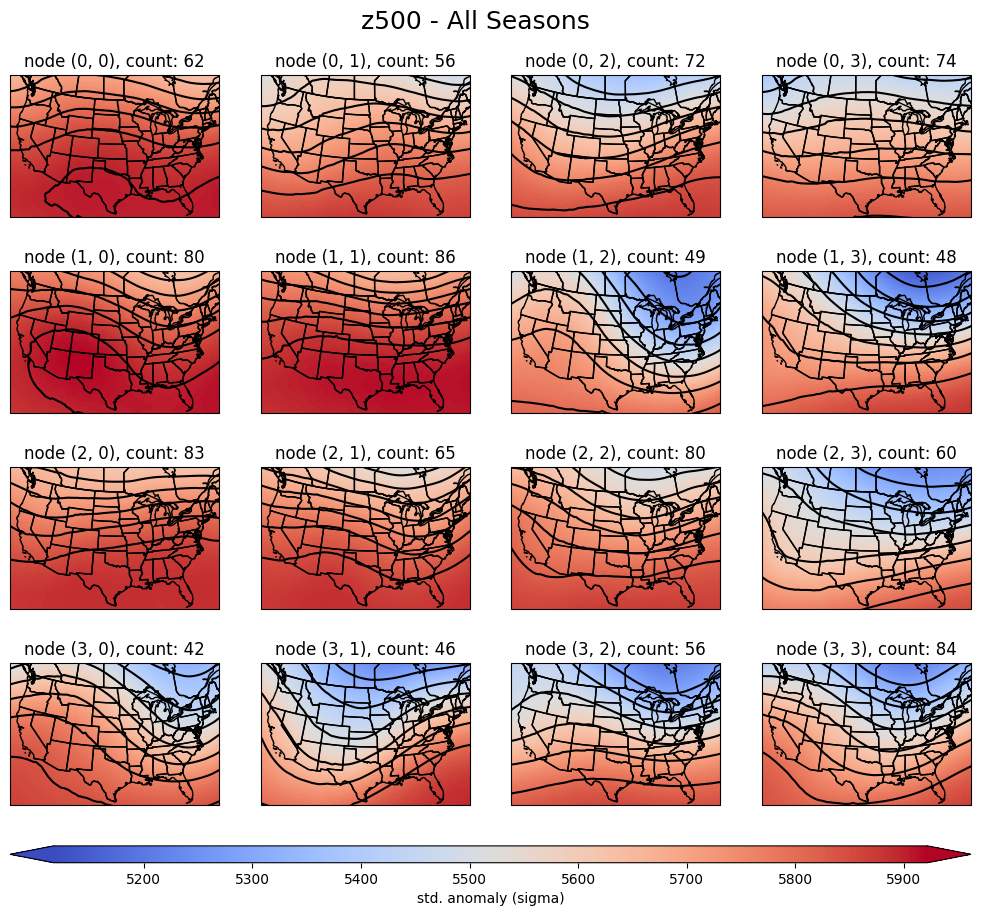

In [143]:
gs = GridSpec(nrows= length + 1, ncols= width, height_ratios=[1]*length + [0.1])
fig = plt.figure(figsize=(3.1 * length, 2.6 * width))
ax = [fig.add_subplot(gs[(x // length, x % width)], projection=ccrs.LambertConformal())
      for x in range(len(z500_avg_data))]
vmin = np.min(z500_avg_data)
vmax = np.max(z500_avg_data)
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
for i, data in enumerate(z500_avg_data):
    ax[i].set_extent([xr_data.lon.values.min() - 340, xr_data.lon.values.max() - 380,
                      xr_data.lat.values.min() + 3, xr_data.lat.values.max() - 3])
    ax[i].add_feature(cfeature.BORDERS)
    ax[i].add_feature(cfeature.STATES)
    
    cf = ax[i].pcolormesh(xr_data.lon, xr_data.lat, data, cmap='coolwarm', norm= norm, transform=ccrs.PlateCarree())
    cn = ax[i].contour(xr_data.lon, xr_data.lat, data,  colors='k', transform=ccrs.PlateCarree())
    ax[i].set_title(f'node {node_keys[i]}, count: {int(frequencies[i])}')
    
    
cax = fig.add_subplot(gs[-1, :])    
fig.colorbar(cf, cax=cax, label='std. anomaly (sigma)', extend= 'both', orientation='horizontal', aspect=0.8)
plt.suptitle('z500 - All Seasons', fontsize=18, y=0.93)
# plt.savefig('standard_anomalies.png', bbox_inches='tight')
plt.show()


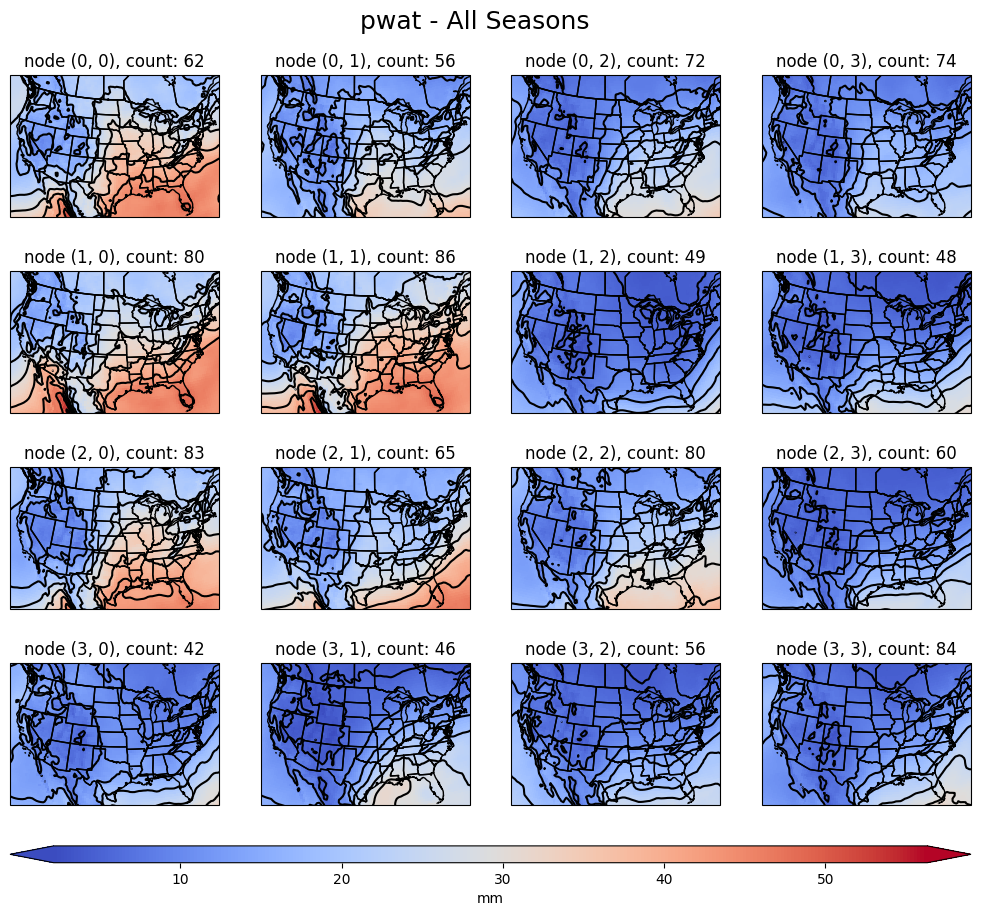

In [146]:
gs = GridSpec(nrows= length + 1, ncols= width, height_ratios=[1]*length + [0.1])
fig = plt.figure(figsize=(3.1 * length, 2.6 * width))
ax = [fig.add_subplot(gs[(x // length, x % width)], projection=ccrs.LambertConformal())
      for x in range(len(pwat_avg_data))]
vmin = np.min(pwat_avg_data)
vmax = np.max(pwat_avg_data)
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
for i, data in enumerate(pwat_avg_data):
    ax[i].set_extent([xr_data.lon.values.min() - 340, xr_data.lon.values.max() - 380,
                      xr_data.lat.values.min() + 3, xr_data.lat.values.max() - 3])
    ax[i].add_feature(cfeature.BORDERS)
    ax[i].add_feature(cfeature.STATES)
    
    cf = ax[i].pcolormesh(xr_data.lon, xr_data.lat, data, cmap='coolwarm', norm= norm, transform=ccrs.PlateCarree())
    cn = ax[i].contour(xr_data.lon, xr_data.lat, data,  colors='k', transform=ccrs.PlateCarree())
    ax[i].set_title(f'node {node_keys[i]}, count: {int(frequencies[i])}')
    
    
cax = fig.add_subplot(gs[-1, :])    
fig.colorbar(cf, cax=cax, label='mm', extend= 'both', orientation='horizontal', aspect=0.8)
plt.suptitle('pwat - All Seasons', fontsize=18, y=0.93)
# plt.savefig('pwat.png', bbox_inches='tight')
plt.show()


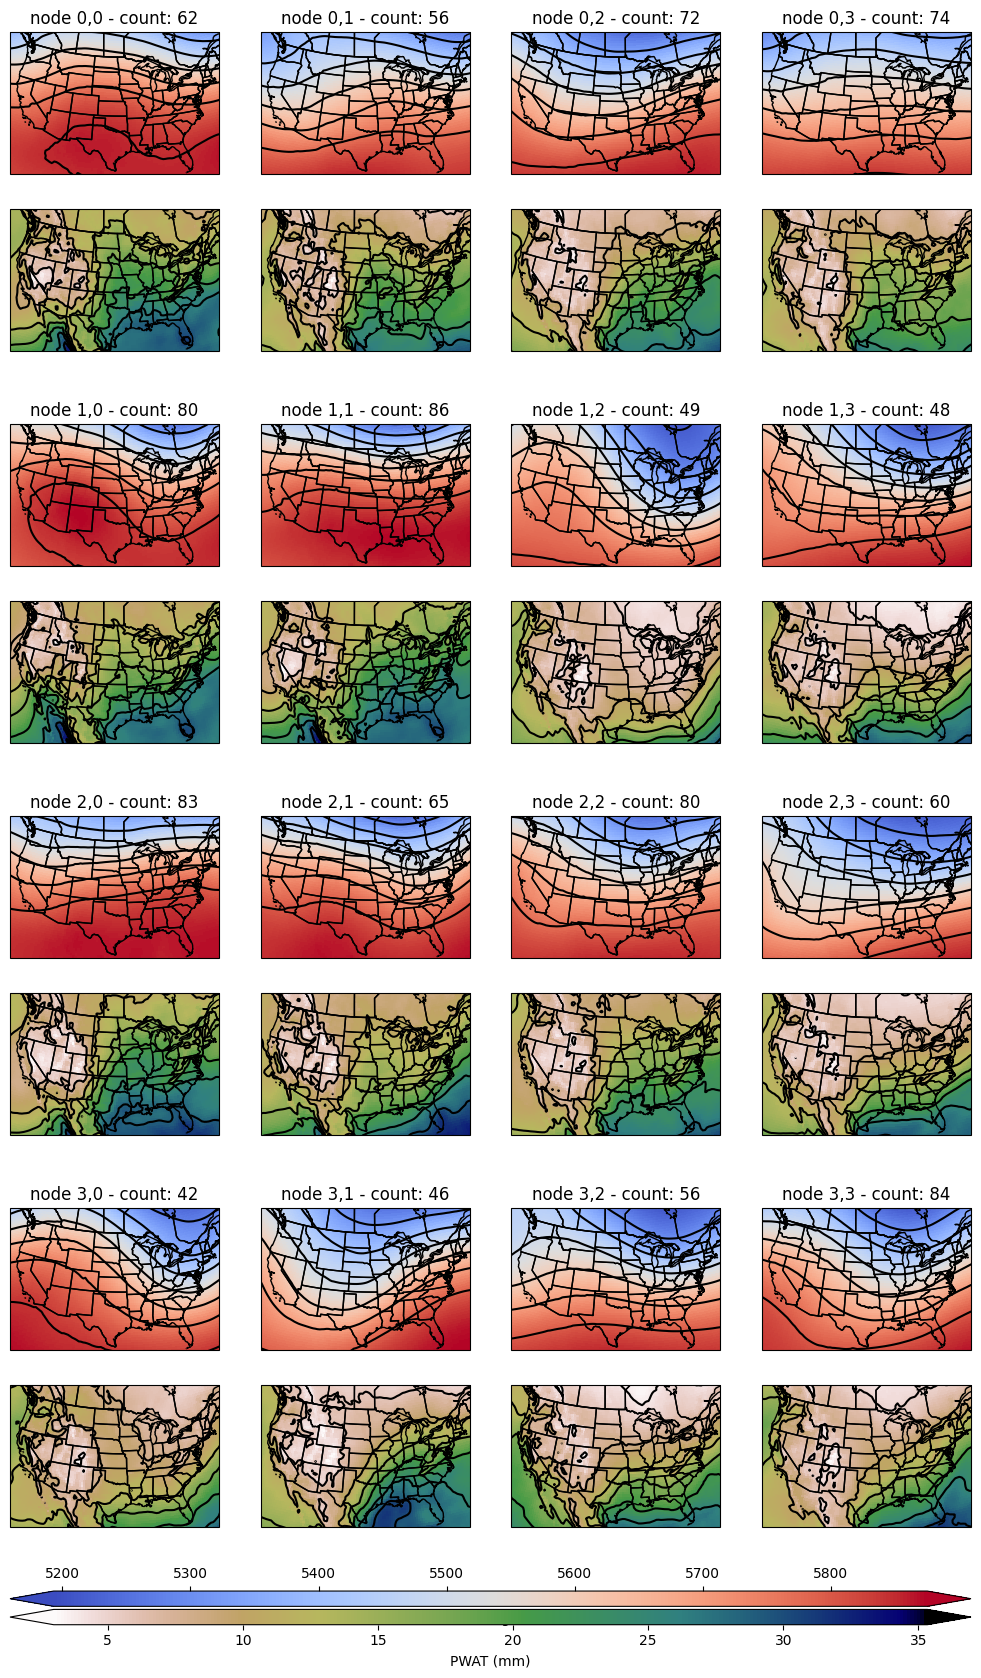

In [202]:
import matplotlib.gridspec as gridspec

# np.reshape(z500_avg_data, (4, 4, 71, 171))
# np.reshape(pwat_avg_data, (4, 4, 71, 171))

vmin_z500 = np.min(z500_avg_data)
vmax_z500 = np.max(z500_avg_data)
norm_z500 = mcolors.Normalize(vmin= vmin_z500, vmax= vmax_z500)

vmin_pwat = np.min(pwat_avg_data)
vmax_pwat = np.max(pwat_avg_data)
norm_pwat = mcolors.Normalize(vmin=vmin_pwat, vmax=vmax_pwat)


fig = plt.figure(figsize=(3.1 * length, 2 * 2.6 * width))


outer = GridSpec(nrows= length + 1, ncols= width, figure= fig, height_ratios = [1] * length + [0.1])

for i in range(length):
    for j in range(width):
        node_idx = i * width + j
        inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i, j], hspace= 0.1, wspace= 0.05)
        
        ax_z500 = fig.add_subplot(inner[0,0], projection= ccrs.LambertConformal())
        ax_z500.set_title(f'node {i},{j} - count: {int(frequencies[node_idx])}')
        ax_z500.set_extent([xr_data.lon.values.min() - 340, xr_data.lon.values.max() - 380, xr_data.lat.values.min() + 3, xr_data.lat.values.max() - 3])
        zcm = ax_z500.pcolormesh(xr_data.lon, xr_data.lat, z500_avg_data[node_idx], cmap= 'coolwarm', transform= ccrs.PlateCarree())
        zct = ax_z500.contour(xr_data.lon, xr_data.lat, z500_avg_data[node_idx], colors= 'k', transform= ccrs.PlateCarree())
        ax_z500.add_feature(cfeature.BORDERS)
        ax_z500.add_feature(cfeature.STATES)
        
        ax_pwat = fig.add_subplot(inner[1, 0], projection= ccrs.LambertConformal())
        ax_pwat.set_extent([xr_data.lon.values.min() - 340, xr_data.lon.values.max() - 380, xr_data.lat.values.min() + 3, xr_data.lat.values.max() - 3])
        pcm = ax_pwat.pcolormesh(xr_data.lon, xr_data.lat, pwat_avg_data[node_idx], cmap= 'gist_earth_r', transform= ccrs.PlateCarree())
        pct = ax_pwat.contour(xr_data.lon, xr_data.lat, pwat_avg_data[node_idx], colors= 'k', transform= ccrs.PlateCarree())
        ax_pwat.add_feature(cfeature.BORDERS)
        ax_pwat.add_feature(cfeature.STATES)


cax_inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec= outer[-1, :])        
cax_z500 = fig.add_subplot(cax_inner[0, 0])
cax_pwat = fig.add_subplot(cax_inner[1, 0])

cb_z500 = fig.colorbar(zcm, cax= cax_z500, orientation= 'horizontal', extend= 'both')
cb_z500.ax.xaxis.set_ticks_position('top')
cb_z500.ax.xaxis.set_ticks_position('top')
cb_z500.ax.tick_params(labeltop= True, labelbottom= False)
cb_z500.set_label('500 hPa heights (m)')
fig.colorbar(pcm, cax= cax_pwat, orientation= 'horizontal', extend= 'both', label= 'PWAT (mm)')
plt.savefig('./../figures/combined_z500_pwat.png', bbox_inches= 'tight')

# 500 hPa heights, 2m Dewpoint: (Spring):


In [3]:
prefs = {'filename': "/home/z2034747/Research/Datasets/Combined/spring_td2m_standard_anomaly_z500_standard_anomaly.nc", 
         'var1': 'z500_standard_anomaly', 'var2': 'td2m_standard_anomaly', 'wlon': 220, 'elon': 305, 'nlat': 55, 'slat': 20, 
         'som_config': {'x': 4, 'y': 4, 'sigma': 0.5, 'random_seed': 42},
         'som_train': {'num_iteration': 10000, 'random_order': True, 'verbose': True}}

trained_som, trained_scaler, train_info, xr_data = train_som(prefs)

current model configuration
{'input_len': 24282, 'random_seed': 42, 'sigma': 0.5, 'x': 4, 'y': 4}
current training configuration
{'data': array([[ 0.01946055,  0.01953107,  0.0209835 , ..., -0.10953376,
        -0.15400004, -0.11454681],
       [ 0.66215056,  0.65774524,  0.6436012 , ...,  0.68710554,
         0.6761851 ,  0.72654825],
       [ 0.49180838,  0.53434277,  0.56640995, ...,  0.0680105 ,
         0.02348073, -0.01009326],
       ...,
       [-0.30698687, -0.29796213, -0.28138995, ..., -0.93526834,
        -1.1493801 , -1.1639796 ],
       [ 0.7283407 ,  0.7337154 ,  0.73069614, ...,  0.77059317,
         0.7976765 ,  0.7634398 ],
       [ 0.734572  ,  0.7381498 ,  0.7299086 , ...,  1.040678  ,
         1.1168607 ,  1.1568481 ]], dtype=float32),
 'num_iteration': 10000,
 'random_order': True,
 'verbose': True}
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 88.44946432302886


In [4]:
win_map = trained_som.win_map(train_info['som_train']['data'])
node_keys = sorted(win_map.keys())

z500_avg_data = [
    np.reshape(
        trained_scaler.inverse_transform([np.mean(win_map[node], axis=0)])[0][:12141],
        (len(xr_data.lat), len(xr_data.lon))
    )
    for node in sorted(win_map.keys())
]

z500_frequencies = trained_som.activation_response(train_info['som_train']['data']).flatten()


td2m_avg_data = [
    np.reshape(
        trained_scaler.inverse_transform([np.mean(win_map[node], axis=0)])[0][12141:],
        (len(xr_data.lat), len(xr_data.lon))
    )
    for node in sorted(win_map.keys())
]

td2m_frequencies = trained_som.activation_response(train_info['som_train']['data']).flatten()


length, width = prefs['som_config']['x'], prefs['som_config']['y']

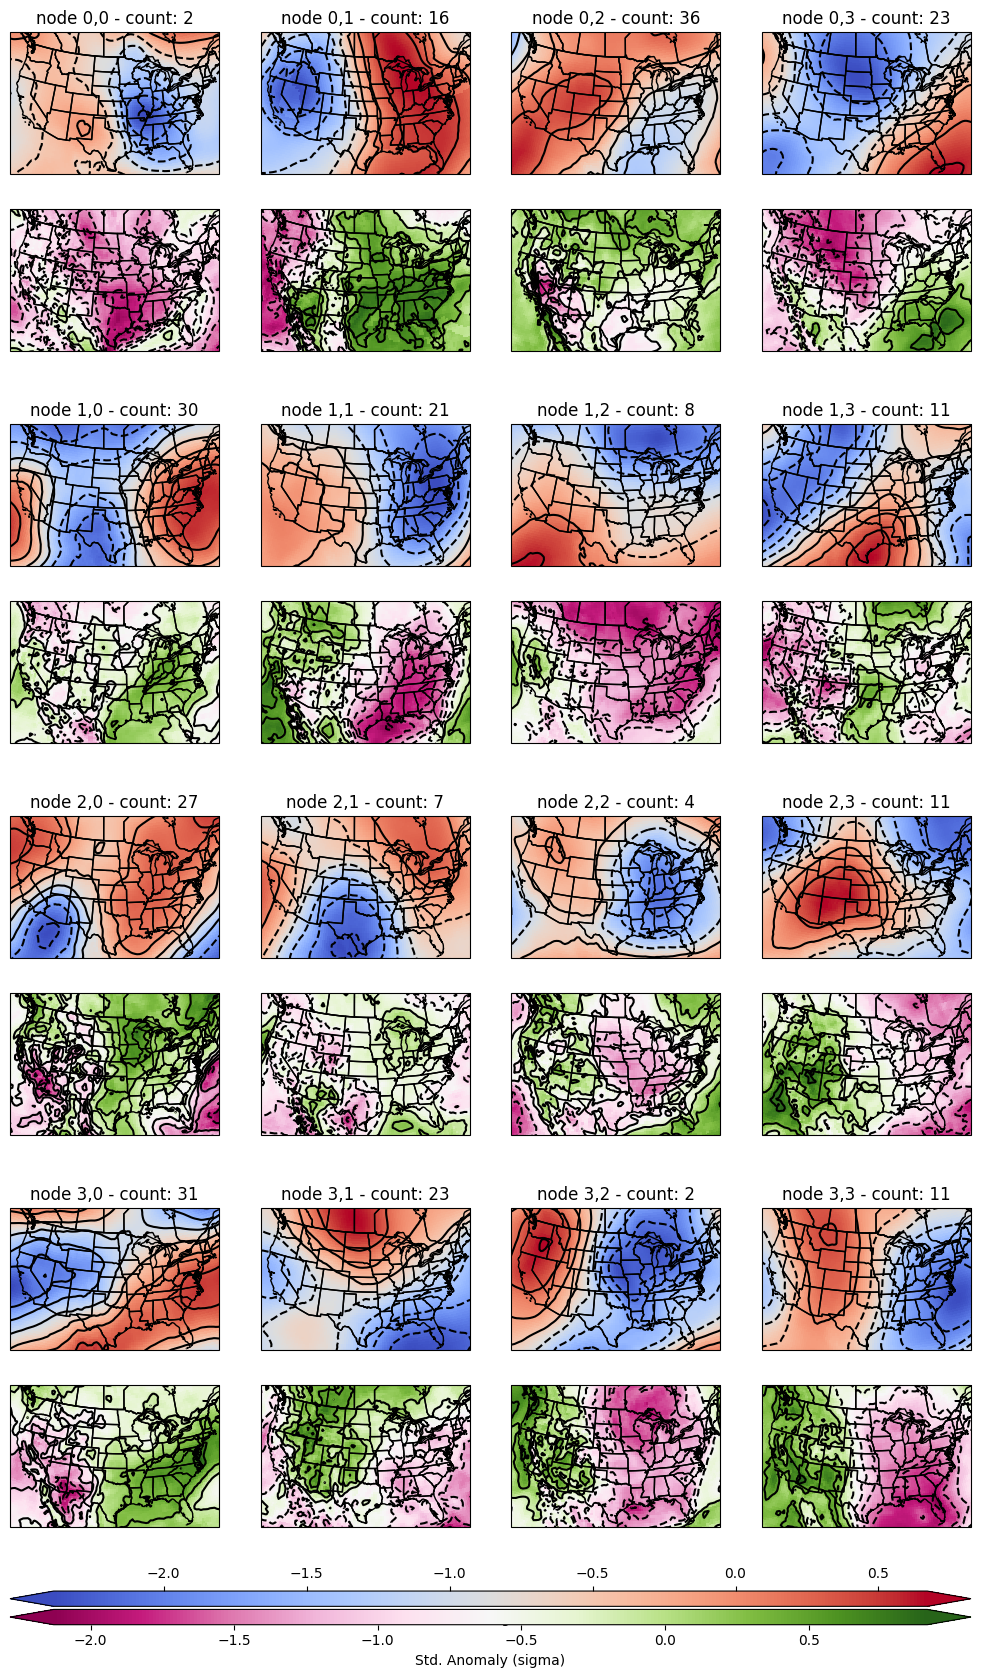

In [11]:
import matplotlib.gridspec as gridspec

# np.reshape(z500_avg_data, (4, 4, 71, 171))
# np.reshape(pwat_avg_data, (4, 4, 71, 171))

vmin_z500 = np.min(z500_avg_data)
vmax_z500 = np.max(z500_avg_data)
norm_z500 = mcolors.Normalize(vmin= vmin_z500, vmax= vmax_z500)

vmin_td2m = np.min(td2m_avg_data)
vmax_td2m = np.max(td2m_avg_data)
norm_td2m = mcolors.Normalize(vmin=vmin_td2m, vmax=vmax_td2m)


fig = plt.figure(figsize=(3.1 * length, 2 * 2.6 * width))


outer = GridSpec(nrows= length + 1, ncols= width, figure= fig, height_ratios = [1] * length + [0.1])

for i in range(length):
    for j in range(width):
        node_idx = i * width + j
        inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i, j], hspace= 0.1, wspace= 0.05)
        
        ax_z500 = fig.add_subplot(inner[0,0], projection= ccrs.LambertConformal())
        ax_z500.set_title(f'node {i},{j} - count: {int(z500_frequencies[node_idx])}')
        ax_z500.set_extent([xr_data.lon.values.min() - 340, xr_data.lon.values.max() - 380, xr_data.lat.values.min() + 3, xr_data.lat.values.max() - 3])
        zcm = ax_z500.pcolormesh(xr_data.lon, xr_data.lat, z500_avg_data[node_idx], cmap= 'coolwarm', transform= ccrs.PlateCarree())
        zct = ax_z500.contour(xr_data.lon, xr_data.lat, z500_avg_data[node_idx], colors= 'k', transform= ccrs.PlateCarree())
        ax_z500.add_feature(cfeature.BORDERS)
        ax_z500.add_feature(cfeature.STATES)
        
        ax_td2m = fig.add_subplot(inner[1, 0], projection= ccrs.LambertConformal())
        ax_td2m.set_extent([xr_data.lon.values.min() - 340, xr_data.lon.values.max() - 380, xr_data.lat.values.min() + 3, xr_data.lat.values.max() - 3])
        pcm = ax_td2m.pcolormesh(xr_data.lon, xr_data.lat, td2m_avg_data[node_idx], cmap= 'PiYG', transform= ccrs.PlateCarree())
        pct = ax_td2m.contour(xr_data.lon, xr_data.lat, td2m_avg_data[node_idx], colors= 'k', transform= ccrs.PlateCarree())
        ax_td2m.add_feature(cfeature.BORDERS)
        ax_td2m.add_feature(cfeature.STATES)


cax_inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec= outer[-1, :])        
cax_z500 = fig.add_subplot(cax_inner[0, 0])
cax_td2m = fig.add_subplot(cax_inner[1, 0])

cb_z500 = fig.colorbar(zcm, cax= cax_z500, orientation= 'horizontal', extend= 'both')
cb_z500.ax.xaxis.set_ticks_position('top')
cb_z500.ax.xaxis.set_ticks_position('top')
cb_z500.ax.tick_params(labeltop= True, labelbottom= False)
cb_z500.set_label('500 hPa heights (m)')
fig.colorbar(pcm, cax= cax_td2m, orientation= 'horizontal', extend= 'both', label= 'Std. Anomaly (sigma)')
plt.savefig('./../figures/combined_z500_td2m.png', bbox_inches= 'tight')

# 500mb heights, dewpoint


In [12]:
prefs = {'filename': "/home/z2034747/Research/Datasets/Combined/z500_td2m.nc", 
         'var1': 'z500', 'var2': 'td2m', 'wlon': 220, 'elon': 305, 'nlat': 55, 'slat': 20, 
         'som_config': {'x': 4, 'y': 4, 'sigma': 0.5, 'random_seed': 42},
         'som_train': {'num_iteration': 10000, 'random_order': True, 'verbose': True}}

trained_som, trained_scaler, train_info, xr_data = train_som(prefs)

current model configuration
{'input_len': 24282, 'random_seed': 42, 'sigma': 0.5, 'x': 4, 'y': 4}
current training configuration
{'data': array([[-0.712504  , -0.7123801 , -0.6898653 , ..., -4.009091  ,
        -4.076801  , -3.9931393 ],
       [-0.04435258, -0.08802831, -0.11636167, ..., -0.56666666,
        -0.74240017, -0.80274475],
       [-0.02644878, -0.02472697, -0.01121567, ..., -1.8121206 ,
        -1.968     , -2.1543741 ],
       ...,
       [ 0.        , -0.01418204, -0.01238249, ..., -0.88181764,
        -1.0400007 , -1.1835339 ],
       [ 0.97334176,  0.9745891 ,  0.9802888 , ...,  0.2939392 ,
         0.33599955,  0.36020532],
       [ 1.0152553 ,  1.0167688 ,  1.0188868 , ...,  0.6030304 ,
         0.71360034,  0.8233274 ]], dtype=float32),
 'num_iteration': 10000,
 'random_order': True,
 'verbose': True}
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 90.0476642559367


In [13]:
win_map = trained_som.win_map(train_info['som_train']['data'])
node_keys = sorted(win_map.keys())

z500_avg_data = [
    np.reshape(
        trained_scaler.inverse_transform([np.mean(win_map[node], axis=0)])[0][:12141],
        (len(xr_data.lat), len(xr_data.lon))
    )
    for node in sorted(win_map.keys())
]

z500_frequencies = trained_som.activation_response(train_info['som_train']['data']).flatten()


td2m_avg_data = [
    np.reshape(
        trained_scaler.inverse_transform([np.mean(win_map[node], axis=0)])[0][12141:],
        (len(xr_data.lat), len(xr_data.lon))
    )
    for node in sorted(win_map.keys())
]

td2m_frequencies = trained_som.activation_response(train_info['som_train']['data']).flatten()


length, width = prefs['som_config']['x'], prefs['som_config']['y']

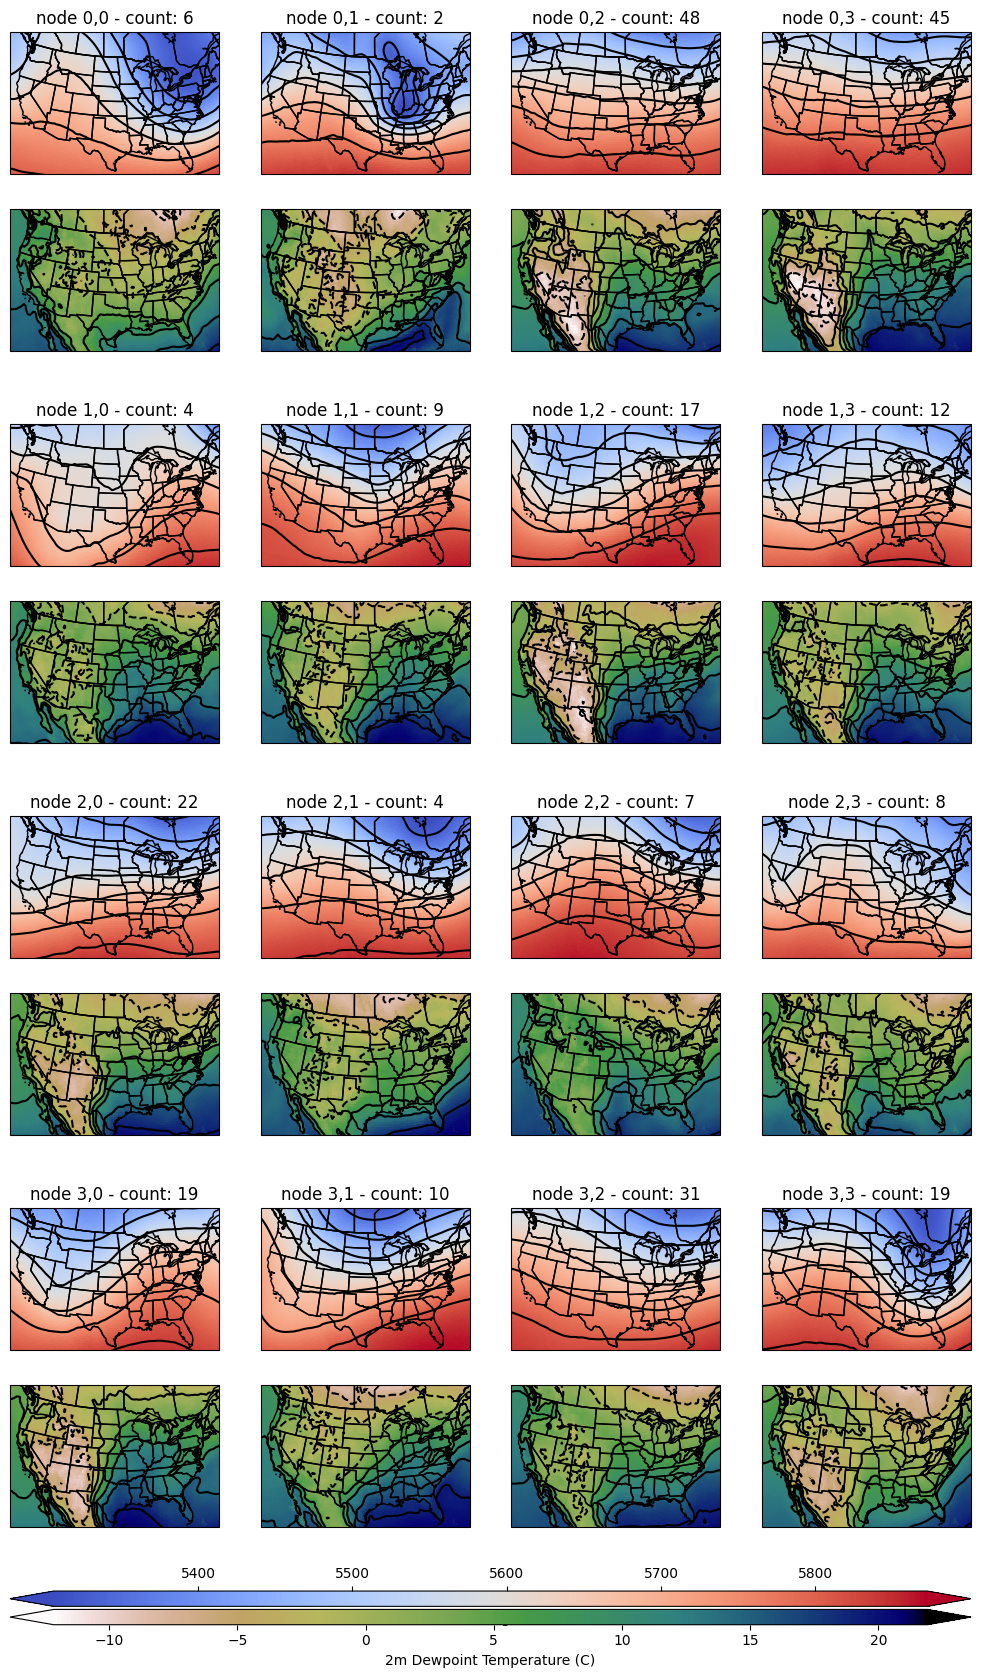

In [16]:
import matplotlib.gridspec as gridspec

# np.reshape(z500_avg_data, (4, 4, 71, 171))
# np.reshape(pwat_avg_data, (4, 4, 71, 171))

vmin_z500 = np.min(z500_avg_data)
vmax_z500 = np.max(z500_avg_data)
norm_z500 = mcolors.Normalize(vmin= vmin_z500, vmax= vmax_z500)

vmin_td2m = np.min(td2m_avg_data)
vmax_td2m = np.max(td2m_avg_data)
norm_td2m = mcolors.Normalize(vmin=vmin_td2m, vmax=vmax_td2m)


fig = plt.figure(figsize=(3.1 * length, 2 * 2.6 * width))


outer = GridSpec(nrows= length + 1, ncols= width, figure= fig, height_ratios = [1] * length + [0.1])

for i in range(length):
    for j in range(width):
        node_idx = i * width + j
        inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i, j], hspace= 0.1, wspace= 0.05)
        
        ax_z500 = fig.add_subplot(inner[0,0], projection= ccrs.LambertConformal())
        ax_z500.set_title(f'node {i},{j} - count: {int(z500_frequencies[node_idx])}')
        ax_z500.set_extent([xr_data.lon.values.min() - 340, xr_data.lon.values.max() - 380, xr_data.lat.values.min() + 3, xr_data.lat.values.max() - 3])
        zcm = ax_z500.pcolormesh(xr_data.lon, xr_data.lat, z500_avg_data[node_idx], cmap= 'coolwarm', transform= ccrs.PlateCarree())
        zct = ax_z500.contour(xr_data.lon, xr_data.lat, z500_avg_data[node_idx], colors= 'k', transform= ccrs.PlateCarree())
        ax_z500.add_feature(cfeature.BORDERS)
        ax_z500.add_feature(cfeature.STATES)
        
        ax_td2m = fig.add_subplot(inner[1, 0], projection= ccrs.LambertConformal())
        ax_td2m.set_extent([xr_data.lon.values.min() - 340, xr_data.lon.values.max() - 380, xr_data.lat.values.min() + 3, xr_data.lat.values.max() - 3])
        pcm = ax_td2m.pcolormesh(xr_data.lon, xr_data.lat, td2m_avg_data[node_idx], cmap= 'gist_earth_r', transform= ccrs.PlateCarree())
        pct = ax_td2m.contour(xr_data.lon, xr_data.lat, td2m_avg_data[node_idx], colors= 'k', transform= ccrs.PlateCarree())
        ax_td2m.add_feature(cfeature.BORDERS)
        ax_td2m.add_feature(cfeature.STATES)


cax_inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec= outer[-1, :])        
cax_z500 = fig.add_subplot(cax_inner[0, 0])
cax_td2m = fig.add_subplot(cax_inner[1, 0])

cb_z500 = fig.colorbar(zcm, cax= cax_z500, orientation= 'horizontal', extend= 'both')
cb_z500.ax.xaxis.set_ticks_position('top')
cb_z500.ax.xaxis.set_ticks_position('top')
cb_z500.ax.tick_params(labeltop= True, labelbottom= False)
cb_z500.set_label('500 hPa heights (m)')
fig.colorbar(pcm, cax= cax_td2m, orientation= 'horizontal', extend= 'both', label= '2m Dewpoint Temperature (C)')
plt.savefig('./../figures/combined_z500_td2m.png', bbox_inches= 'tight')